In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier,BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [2]:
#Q1 A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
#Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [3]:
features = pd.read_csv('Company_Data.csv')
features.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
features.shape

(400, 11)

In [6]:
features.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [7]:
label_encoder = preprocessing.LabelEncoder()
features['ShelveLoc']= label_encoder.fit_transform(features['ShelveLoc']) 

In [8]:
df=pd.get_dummies(features,columns=['Urban','US'], drop_first=True)

In [9]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


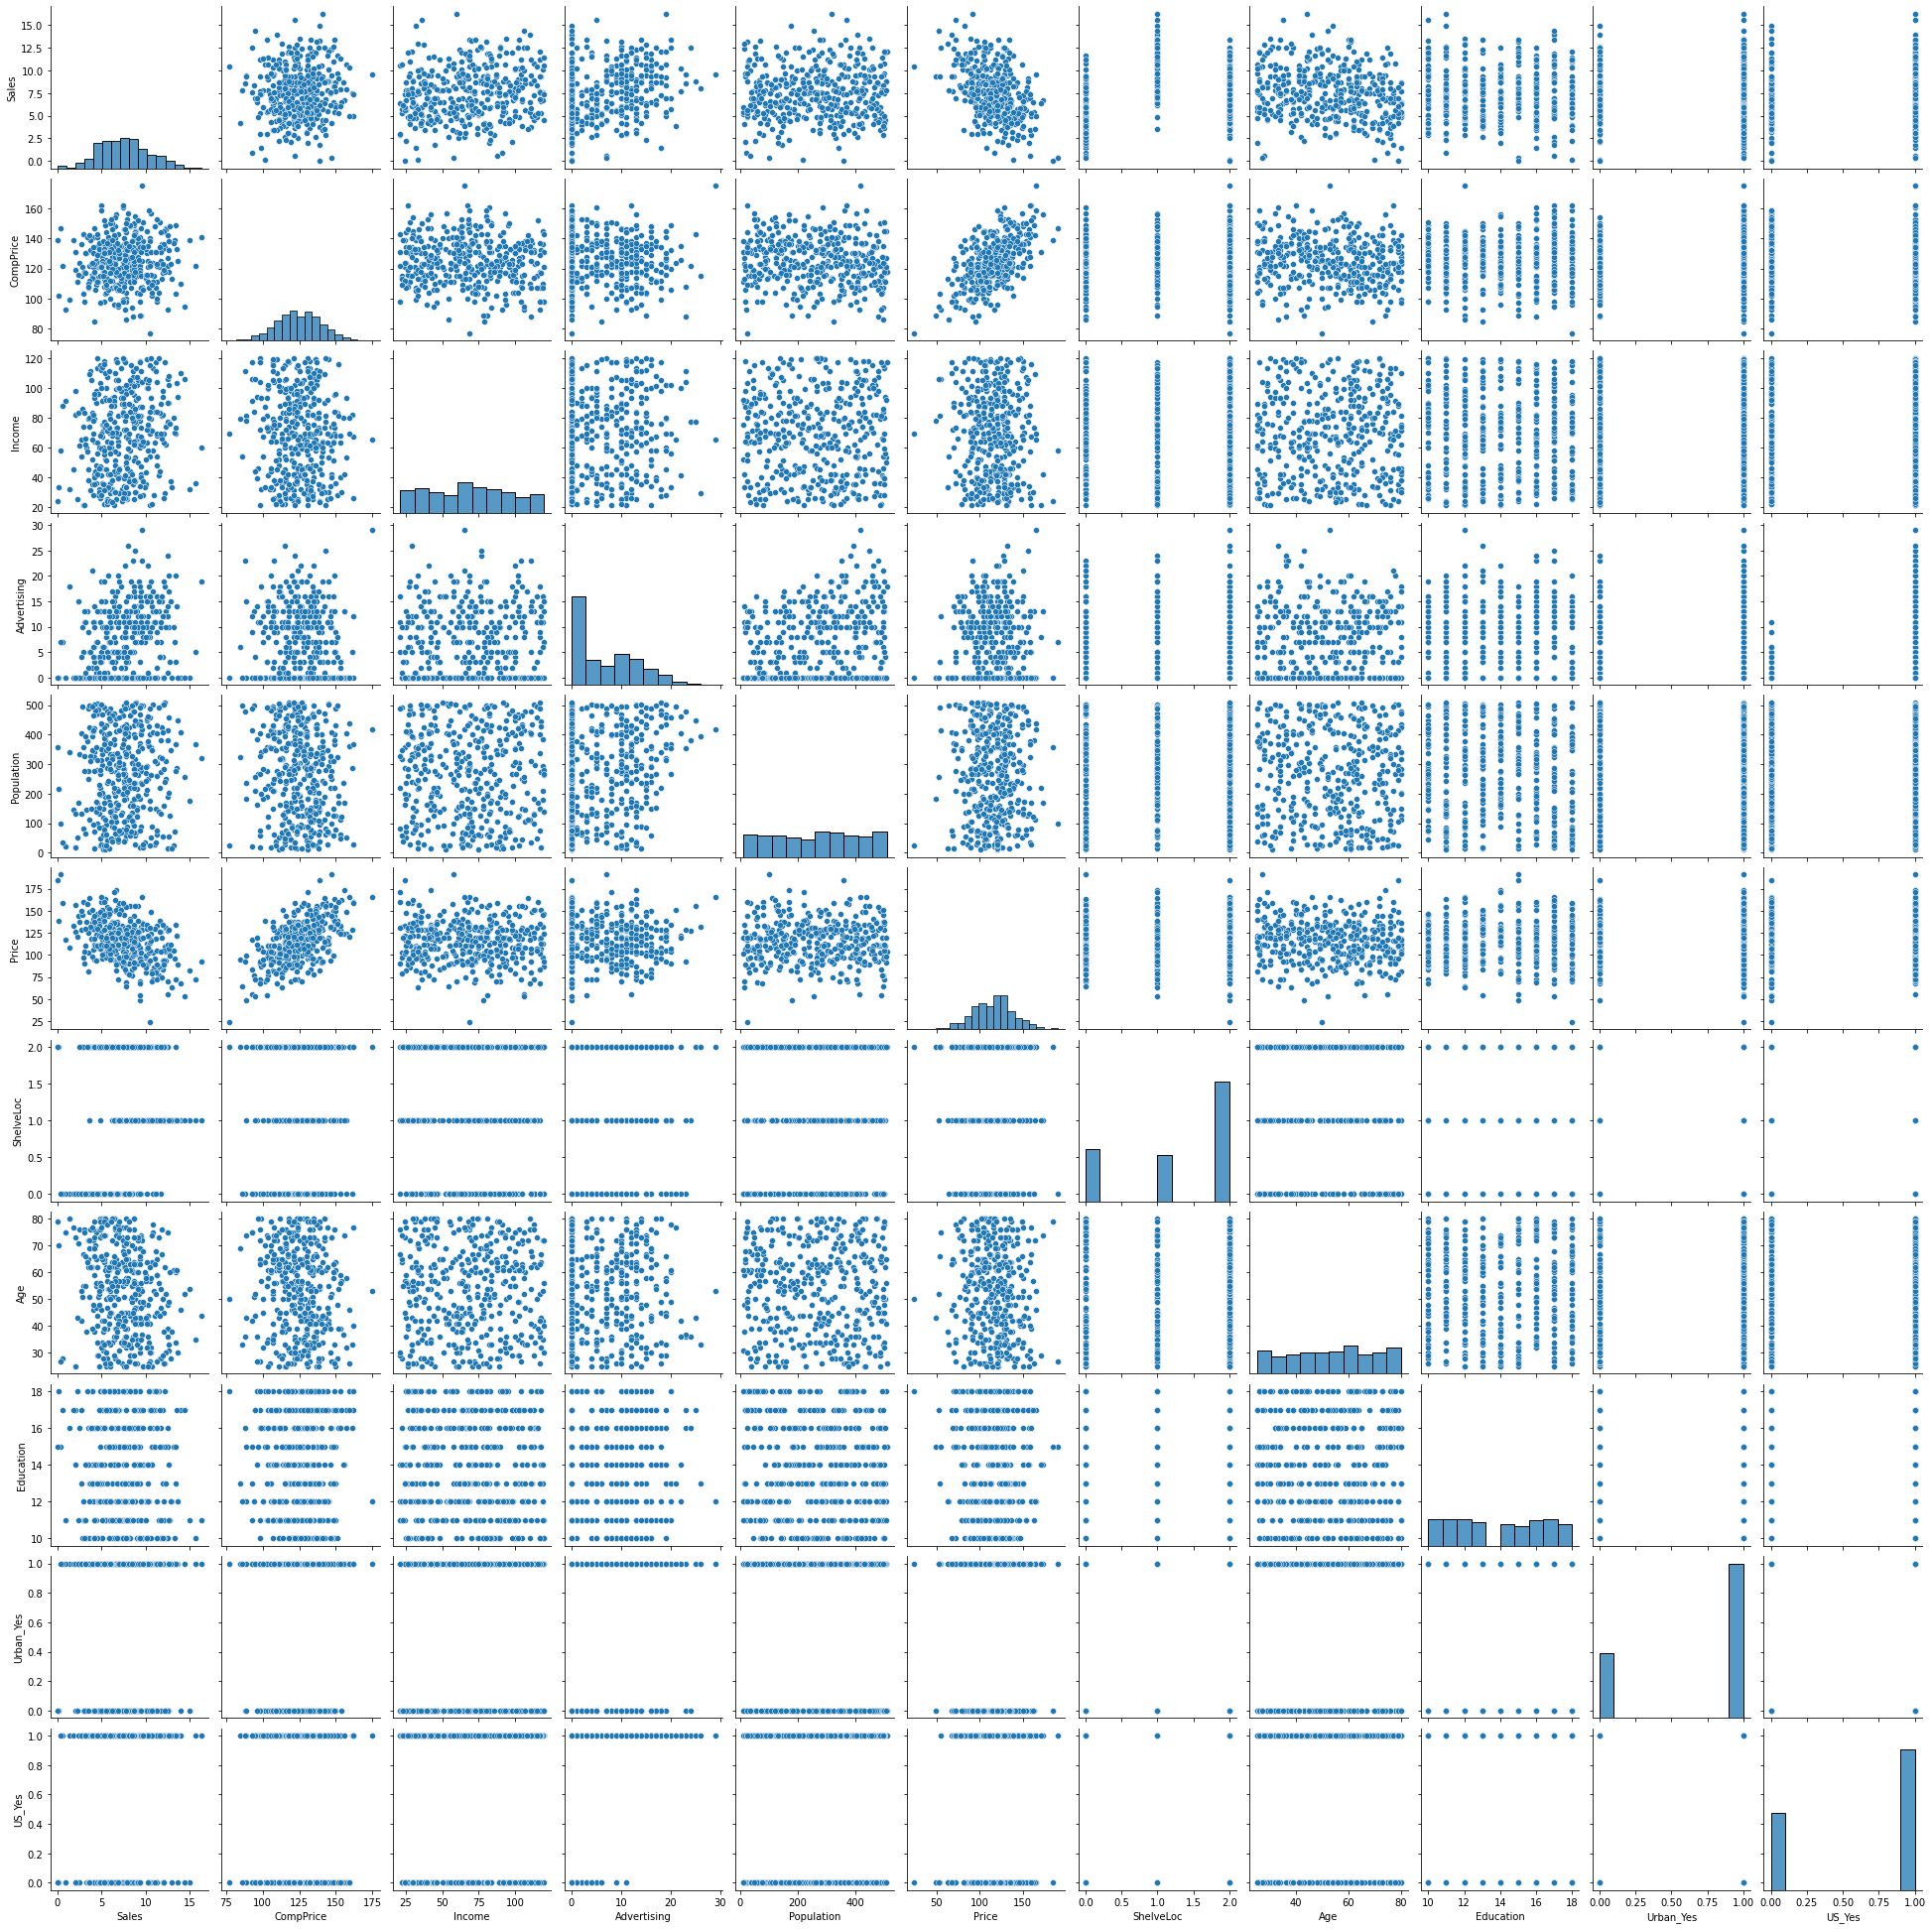

In [10]:
sns.pairplot(df)

C:\Users\Avani\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Income'>

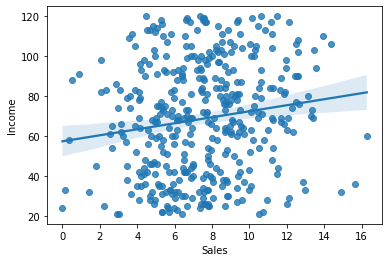

In [11]:
sns.regplot('Sales','Income', data=df)  

<AxesSubplot:>

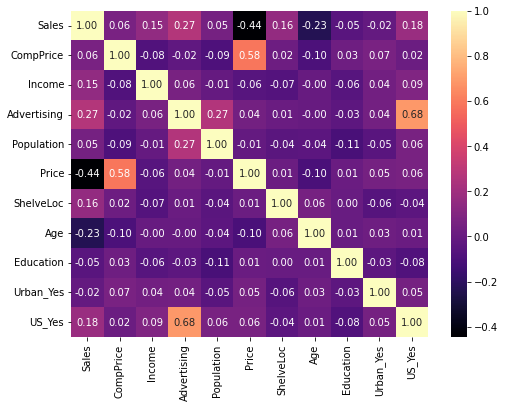

In [12]:
plt.figure(figsize = (8, 6));
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt=".2f")

Since the target variable is continious, we create a class of the value based on the mean <= 7.49 == "Small" and > 7.49 == "large"

In [13]:
df["sales"]="small"
df.loc[df["Sales"]>7.49,"sales"]="large"
df.drop(["Sales"],axis=1,inplace=True)
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sales
0,138,73,11,276,120,0,42,17,1,1,large
1,111,48,16,260,83,1,65,10,1,1,large
2,113,35,10,269,80,2,59,12,1,1,large
3,117,100,4,466,97,2,55,14,1,1,small
4,141,64,3,340,128,0,38,13,1,0,small
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,large
396,139,23,3,37,120,2,55,11,0,1,small
397,162,26,12,368,159,2,40,18,1,1,small
398,100,79,7,284,95,0,50,12,1,1,small


In [14]:
X = df.iloc[:,0:10]
Y = df.iloc[:,10]

In [15]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [16]:
Y

0      large
1      large
2      large
3      small
4      small
       ...  
395    large
396    small
397    small
398    small
399    large
Name: sales, Length: 400, dtype: object

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [18]:
modela=RandomForestClassifier()
modela.fit(x_train,y_train)
pred=modela.predict(x_test)
print(np.mean(y_test==pred))

0.775


In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       large       0.79      0.79      0.79        43
       small       0.76      0.76      0.76        37

    accuracy                           0.78        80
   macro avg       0.77      0.77      0.77        80
weighted avg       0.78      0.78      0.78        80



In [20]:
confusion_matrix(y_test,pred)

array([[34,  9],
       [ 9, 28]], dtype=int64)

Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 77.5%.As seen in the confusion matrix of Test data 62 instances are predicted correctly and 18 instances are not predicted correctly.

In [21]:
#Q2 Use Random Forest to prepare a model on fraud data 
#treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [22]:
data=pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [24]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [25]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [26]:
df1=data.copy()
df1.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES


In [27]:
df1.insert(6,'tax_class'," ")

for i in range(0,len(df1['Taxable.Income']),1):
    if df1['Taxable.Income'].iloc[i]<=30000:
        df1['tax_class'].iloc[i]='Risky'
    else:
        df1['tax_class'].iloc[i]='Good'

C:\Users\Avani\AppData\Local\Temp\ipykernel_24212\75839587.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tax_class'].iloc[i]='Good'
C:\Users\Avani\AppData\Local\Temp\ipykernel_24212\75839587.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tax_class'].iloc[i]='Risky'


In [28]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [29]:
df1.tax_class.value_counts()

Good     476
Risky    124
Name: tax_class, dtype: int64

In [30]:
df1.drop(['Taxable.Income'],axis=1,inplace=True)
df1.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [31]:
label_encoder = preprocessing.LabelEncoder()
df1['Undergrad']= label_encoder.fit_transform(df1['Undergrad'])
df1['Marital.Status']= label_encoder.fit_transform(df1['Marital.Status'])
df1['Urban']= label_encoder.fit_transform(df1['Urban'])
df1['tax_class']= label_encoder.fit_transform(df1['tax_class'])

In [32]:
df1.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [33]:
df1.iloc[:,2:4]=StandardScaler().fit_transform(df1.iloc[:,2:4])
df1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0
2,0,1,1.033109,1.634639,1,0
3,1,2,1.696831,-0.063197,1,0
4,0,1,-1.630532,1.408261,0,0
...,...,...,...,...,...,...
595,1,0,-1.390432,-0.968710,1,0
596,1,0,-1.071672,-1.534655,1,0
597,0,0,0.909696,-1.761033,1,0
598,1,1,1.432197,0.163181,0,0


In [34]:
pdata=df1.copy()
pdata.head(2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0


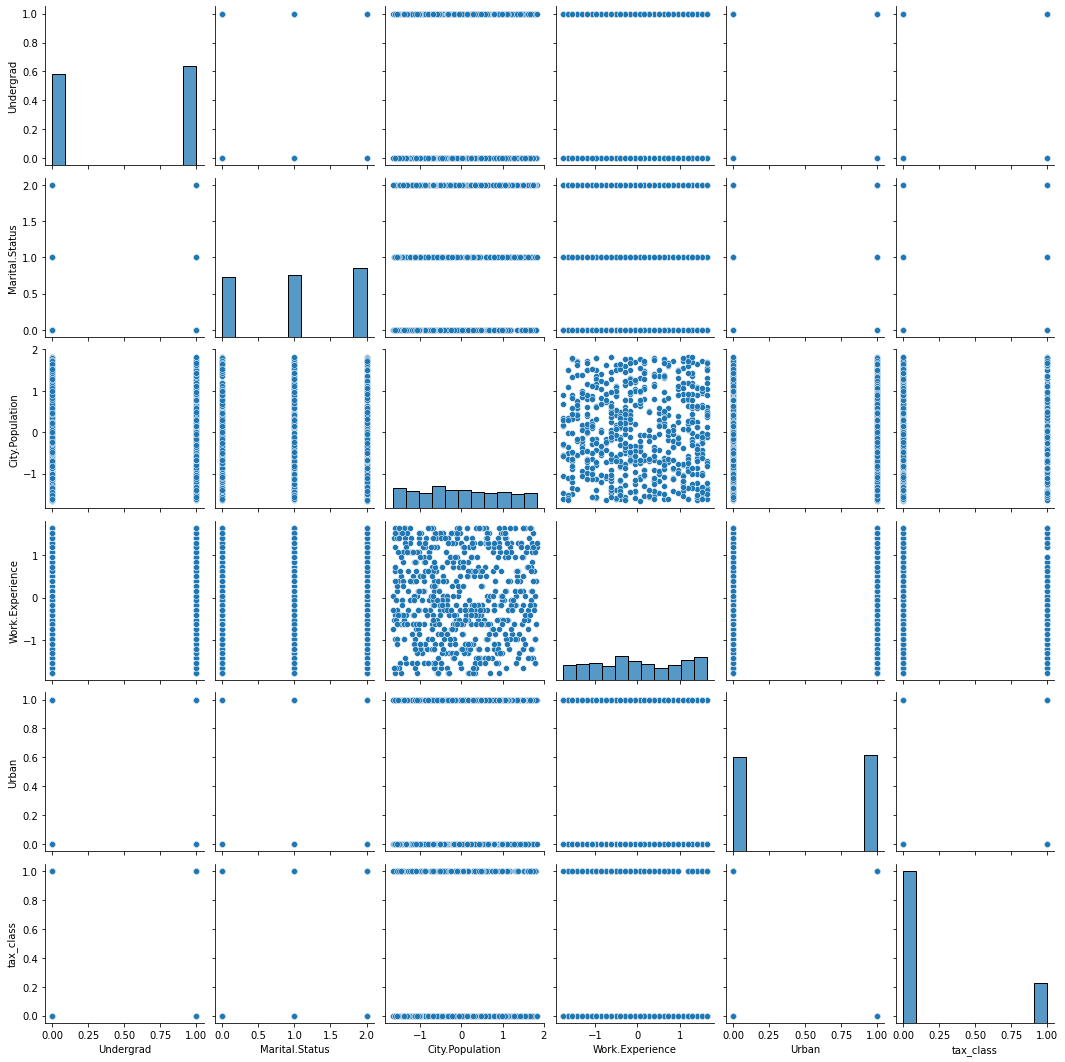

In [35]:
sns.pairplot(pdata)

<AxesSubplot:>

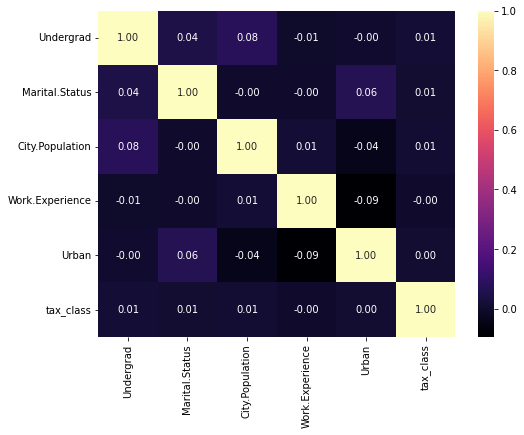

In [36]:
plt.figure(figsize = (8, 6));
sns.heatmap(pdata.corr(), cmap='magma', annot=True, fmt=".2f")

In [37]:
x=pdata.iloc[:,0:-1]
y=pdata['tax_class']
y.value_counts()

0    476
1    124
Name: tax_class, dtype: int64

In [38]:
### Model building using Random forest

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [40]:
modelb=RandomForestClassifier()
modelb.fit(x_train,y_train)
pred=modelb.predict(x_test)
print(np.mean(y_test==pred))

0.7333333333333333


In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        94
           1       0.00      0.00      0.00        26

    accuracy                           0.73       120
   macro avg       0.39      0.47      0.42       120
weighted avg       0.60      0.73      0.66       120



In [42]:
confusion_matrix(y_test,pred)

array([[88,  6],
       [26,  0]], dtype=int64)

Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 73.3%.As seen in the confusion matrix of Test data 88 instances are predicted correctly and 32 instances are not predicted correctly.